In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(
    "data/apple_stock.csv",
    index_col='Date',
    parse_dates=['Date']
)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Bollinger Bands

Bollinger Bands 란  
MA (rolling mean) 에서 위 아래로 2 std 만큼의 경계를 표시한 차트  
(참고로 upper를 넘어가면 사고, lower를 내려가면 팔아야 한다고 함 ...)

In [9]:
# 20일 주기의 MA
df['Close_20_Days_Mean'] = df['Close'].rolling(20).mean()

# +2 std
df['Close_20_Days_Upper'] = df['Close_20_Days_Mean'] + 2 * df['Close'].rolling(20).std()

# -2 std
df['Close_20_Days_Lower'] = df['Close_20_Days_Mean'] - 2 * df['Close'].rolling(20).std()

In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Close_20_Days_Mean,Close_20_Days_Upper,Close_20_Days_Lower
Date,,,,,,,,,
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002,169.085002,188.750620,149.419384
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998,168.212502,188.385985,148.039020
2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994,167.308002,187.960084,146.655919
2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996,166.072501,186.241665,145.903338
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005,164.982001,184.428450,145.535553


#### Plotting

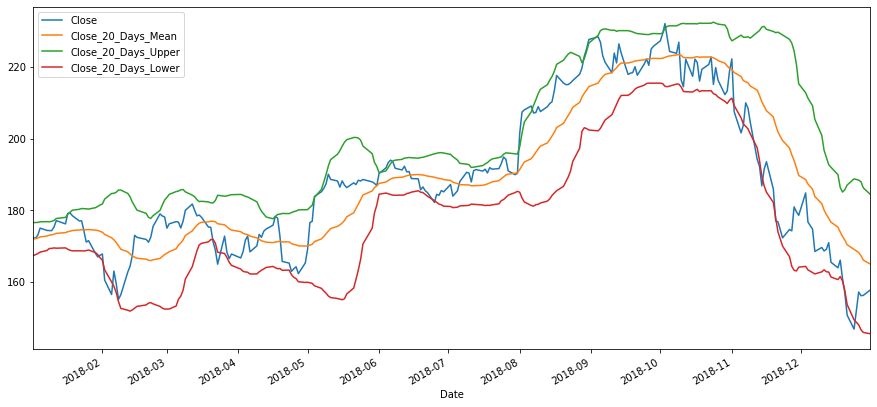

In [14]:
df['2018':][['Close', 'Close_20_Days_Mean', 'Close_20_Days_Upper', 'Close_20_Days_Lower']].plot(figsize=(15, 7))